In [1]:
with open('/content/drive/MyDrive/SudoCode/Week 1 - Text Embeddings/viwik19.txt', encoding='utf-16') as f:
    data = f.read()

In [2]:
print(len(data))

72317211


In [3]:
data[:200]

'trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu '

In [4]:
 from nltk import sent_tokenize, word_tokenize

In [5]:

  >>> import nltk
  >>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
tokens = word_tokenize(data)

In [21]:
tokens[:5]

['trang', 'chính', 'internet', 'society', 'internet']

In [8]:
!pip install -U gensim

In [22]:
from gensim.models import Word2Vec


In [23]:
sentences = [tokens]

In [24]:
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=4,
    epochs=10,
    compute_loss=True   # ✅ enable loss tracking
)

In [25]:
import logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

In [26]:
model.build_vocab(sentences)

In [27]:
losses = []
for epoch in range(10):
    model.train(
        sentences,
        total_examples=model.corpus_count,
        epochs=1
    )
    losses.append(model.get_latest_training_loss())

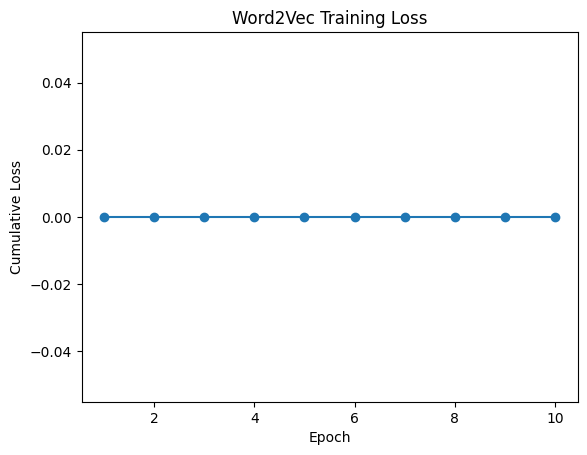

In [28]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Cumulative Loss")
plt.title("Word2Vec Training Loss")
plt.show()

In [29]:
embedding_matrix = model.wv.vectors

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (27617, 100)


In [30]:
word_to_index = {word: idx for idx, word in enumerate(model.wv.index_to_key)}

In [31]:
print(model.wv.index_to_key[:30])  # first 30 tokens

['một', 'không', 'và', 'của', 'là', 'các', 'năm', 'hai', 'có', 'trong', 'được', 'chín', 'người', 'với', 'ba', 'cho', 'đã', 'thành', 'những', 'bốn', 'tám', 'từ', 'ở', 'sáu', 'bảy', 'này', 'vào', 'quốc', 'nam', 'công']


In [39]:
#Gemini Display the embeddings for the first 5 words in the vocabulary
for i, word in enumerate(list(word_to_index.keys())[:5]):
    print(f"Embedding for '{word}':")
    display(embedding_matrix[word_to_index[word]])

Embedding for 'một':


array([-3.85823883e-02, -5.94143629e-01, -5.26314855e-01,  4.77947652e-01,
       -5.23215711e-01,  1.30362377e-01,  1.71671361e-01,  7.98764944e-01,
       -8.55873078e-02,  1.84131593e-01,  3.57421100e-01,  3.42671633e-01,
       -8.64731967e-02, -3.23020250e-01,  7.07884580e-02, -1.36369660e-01,
        4.89978969e-01, -1.00709176e+00, -6.16759956e-01, -3.49496543e-01,
       -4.90727909e-02,  5.33210263e-02, -5.76128185e-01, -7.15576053e-01,
       -4.56667691e-03, -3.06773037e-01, -1.00874931e-01, -2.18938529e-01,
       -6.69846833e-02, -2.66833216e-01,  9.16443706e-01,  7.74547756e-01,
        3.68323058e-01,  1.09213836e-01, -5.22971511e-01,  6.95119202e-01,
       -2.81679660e-01,  9.75280926e-02,  6.17677197e-02, -2.85970211e-01,
        1.69680789e-02, -2.60514796e-01,  9.74443331e-02, -2.31395498e-01,
       -1.80358797e-01, -1.67762667e-01, -5.47032595e-01, -5.33682525e-01,
       -3.04868132e-01, -1.57924980e-01, -2.48622760e-01, -1.04322270e-01,
        2.11257920e-01, -

Embedding for 'không':


array([-0.04142627, -0.50268686, -0.77250993,  0.35762167, -0.4563097 ,
        0.12215861,  0.20757306,  0.9332458 , -0.1818901 ,  0.22374097,
        0.39512968,  0.38433024,  0.09928653,  0.04929513, -0.03149544,
       -0.07986731,  0.6329806 , -1.2105061 , -0.6666455 , -0.34941167,
        0.09814492,  0.03600407, -0.4660401 , -0.66345453, -0.08989462,
       -0.40334177, -0.19138359, -0.23940003,  0.02354086, -0.3384104 ,
        1.2375346 ,  0.8666639 ,  0.5865709 , -0.0139836 , -0.45571637,
        0.66485775, -0.21051846,  0.3059379 ,  0.19669291, -0.6310802 ,
        0.04518985, -0.14039741,  0.03303374, -0.24881606, -0.46187192,
       -0.10613101, -0.5086923 , -0.3575711 , -0.23974907, -0.07506184,
       -0.25135   , -0.00732752,  0.20487192,  0.07484812,  0.43857768,
       -0.18165445,  0.1769593 , -0.6719599 ,  0.43592095, -0.06023848,
        0.2291317 , -0.33821318,  0.6992909 , -0.21031423, -0.49327368,
       -0.56869566, -0.07283919,  0.5192589 , -1.3382903 , -0.61

Embedding for 'và':


array([-0.1273841 , -0.27587903, -0.4131933 ,  0.3533118 , -0.39308172,
       -0.18474498,  0.2428125 ,  0.8319852 , -0.4094014 ,  0.15388946,
        0.01644623, -0.09178152, -0.08440939, -0.10893673,  0.13774942,
       -0.4306777 ,  0.45053226, -0.54779965, -0.44678515, -0.14116143,
        0.18397318,  0.02517782, -0.19861263, -0.5670765 ,  0.11073355,
       -0.1360174 , -0.15271834, -0.22679111, -0.07347478, -0.2727595 ,
        0.85225314,  0.5214365 ,  0.27862152,  0.02156137, -0.20477413,
        0.72540784, -0.2727523 ,  0.00521116,  0.18514307, -0.5990137 ,
        0.05142405, -0.26565802,  0.03853874,  0.00332747, -0.06298495,
       -0.27051625, -0.38975734, -0.2644081 , -0.04207941, -0.13877101,
       -0.19776554, -0.2613258 ,  0.19428994, -0.0769306 , -0.04097005,
       -0.12465153, -0.04084763, -0.36394078,  0.16886362,  0.05656385,
        0.29317352, -0.29829732,  0.38677713, -0.24239732, -0.4239571 ,
       -0.28605637,  0.07430512,  0.7399079 , -1.010818  , -0.14

Embedding for 'của':


array([-1.9798192e-01, -4.0483716e-01, -4.7335219e-01,  5.6237191e-01,
       -4.5809469e-01, -2.3305516e-01,  1.1945467e-01,  7.3802972e-01,
       -4.9761656e-01, -5.3514339e-02,  1.2776177e-01, -1.1006981e-01,
       -2.5733769e-01, -2.7627486e-01,  2.9161263e-01, -5.1596653e-01,
        5.6720990e-01, -7.1499646e-01, -6.2099957e-01, -7.4259251e-02,
        1.5989000e-01, -5.0868690e-02, -4.3279433e-01, -4.9869511e-01,
        7.1154520e-02, -6.7002758e-02, -2.0607357e-01, -1.3493490e-01,
       -8.3481684e-02, -1.6897260e-01,  6.2832820e-01,  6.5931761e-01,
        8.7006874e-03, -1.0970205e-01, -1.5744044e-01,  6.8055665e-01,
       -2.1665095e-01, -2.0277335e-01, -1.4162391e-01, -6.4149296e-01,
       -8.4445521e-02, -2.7730733e-01,  1.5353638e-01, -4.3680206e-02,
       -9.6052527e-02, -3.2456636e-01, -2.0671718e-01, -5.6023508e-01,
       -2.2088622e-01,  5.2692492e-02, -2.1274306e-01, -3.2289732e-01,
        3.2918718e-01, -2.9848945e-01, -1.9654888e-01, -2.3753501e-01,
      

Embedding for 'là':


array([-0.21144177, -0.2721489 , -0.5569175 ,  0.61561525, -0.56029266,
       -0.1664224 ,  0.2396358 ,  0.8872659 , -0.4828055 ,  0.28499016,
        0.4641677 ,  0.06749805, -0.10439092,  0.00924091,  0.07248428,
       -0.23551156,  0.5677433 , -0.80594707, -0.29152226, -0.42831177,
        0.1495205 , -0.1813956 , -0.19586791, -0.3102828 , -0.12012111,
       -0.10961889, -0.14707424, -0.26545885, -0.23485762, -0.02304378,
        0.95385   ,  0.73535717,  0.522109  ,  0.16119471, -0.35709321,
        0.8448992 , -0.16024682,  0.08168086, -0.10407738, -0.5954916 ,
       -0.01184446, -0.36896217, -0.06619258,  0.04058683, -0.02913265,
       -0.07155551, -0.4043467 , -0.43662652, -0.32242888, -0.11146481,
       -0.27816594, -0.01567773,  0.11692193,  0.0951905 ,  0.04723343,
       -0.3945428 , -0.19157195, -0.3654152 ,  0.03296545,  0.21403632,
        0.2769797 , -0.515658  ,  0.5246955 , -0.23343325, -0.71216583,
       -0.3475256 ,  0.02630782,  0.7555238 , -1.0031743 , -0.35

In [35]:
model.wv.most_similar('một')

[('tổng', 0.984727144241333),
 ('qđ', 0.9817206263542175),
 ('ba', 0.9817068576812744),
 ('hai', 0.9802822470664978),
 ('tuổi', 0.9785677790641785),
 ('năm', 0.9785078167915344),
 ('bảy', 0.9778538346290588),
 ('sur', 0.9768988490104675),
 ('mục', 0.976535439491272),
 ('bốn', 0.9761865139007568)]

In [37]:
model.wv.most_similar(positive=['nam', 'nữ'], negative=['bé'])

[('còn', 0.9288187623023987),
 ('đây', 0.9161000847816467),
 ('chiếm', 0.9124649167060852),
 ('á', 0.912204384803772),
 ('nằm', 0.9091444611549377),
 ('cư', 0.9088225364685059),
 ('nhưng', 0.9070883393287659),
 ('vào', 0.9035623669624329),
 ('là', 0.90291827917099),
 ('mẹ', 0.901726245880127)]

In [38]:
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.index_to_key}

# Top 10 most frequent
top10 = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print(top10)

[('một', 402666), ('không', 267433), ('và', 254769), ('của', 232454), ('là', 201142), ('các', 190642), ('năm', 190306), ('hai', 167890), ('có', 154689), ('trong', 149428)]
